In [1]:
import tensorflow as tf 
import numpy as np
import PIL
import PIL.Image
from matplotlib import pyplot as plt
import tensorflow_datasets as tfds

import concept_gated_conv

2023-07-05 08:20:58.361204: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2023-07-05 08:21:48.096833: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [2]
	 [[{{node Placeholder/_2}}]]
2023-07-05 08:21:48.097208: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [2]
	 [[{{node Placeholder/_4}}]]


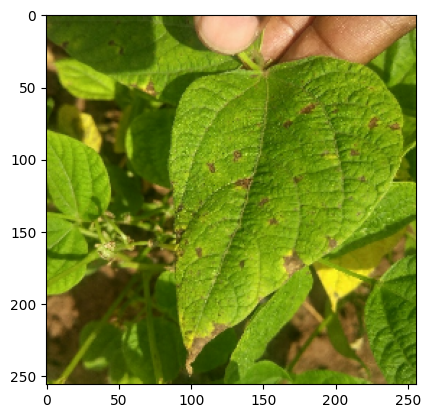

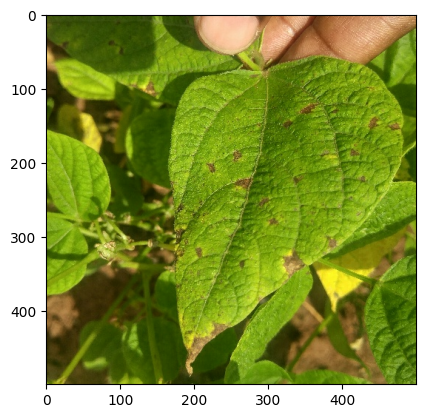

In [5]:
# loading the dataset
def bean_img_iter(bs = 3):
    img_size = (500, 500)
    
    dataset = tfds.load("beans", split='train', shuffle_files=True)
    dataset = dataset.batch(bs, drop_remainder=True, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.repeat()
    dataset = dataset.prefetch(tf.data.AUTOTUNE)

    return iter(dataset)

dsIter = bean_img_iter()
ds = next(dsIter)
dsImages = tf.image.resize(ds['image'], (256, 256)) 

plt.imshow(tf.cast(dsImages[1], dtype=tf.uint8))
plt.show()

plt.imshow(ds['image'][1])
plt.show()



In [6]:
import concept_gated_conv

In [7]:
cgae = concept_gated_conv.concept_gated_conv_ae()
opt = tf.keras.optimizers.AdamW(learning_rate=1e-4)
opt_steps = 100

def loss():
    ds = tf.image.resize(next(dsIter)['image'], (256, 256)) 
    ds = (ds - 128.) / 256.
    ae_loss = tf.keras.losses.MeanSquaredError()(cgae(ds), ds)
    loss = ae_loss + tf.reduce_sum(cgae.loss)
    return loss

for step in range(opt_steps):
    opt.minimize(loss, var_list=cgae.trainable_weights)


2023-07-05 08:22:10.930736: W tensorflow/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 32.00MiB (rounded to 33554432)requested by op RandomUniform
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-07-05 08:22:10.930769: I tensorflow/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2023-07-05 08:22:10.930777: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 124, Chunks in use: 124. 31.0KiB allocated for chunks. 31.0KiB in use in bin. 10.3KiB client-requested in use in bin.
2023-07-05 08:22:10.930783: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (512): 	Total Chunks: 40, Chunks in use: 40. 20.5KiB allocated for chunks. 20.5KiB in use in bin. 20.1KiB client-requested in use in bin.
2023-07-05 08:22:10.930788: I tensorflow/tsl/f

ResourceExhaustedError: {{function_node __wrapped__RandomUniform_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[256,256,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:RandomUniform]